# Random Forests

In classification trees we would set the code to method = class option but in randomforests the way that we do this is by closing the response variable in the function. as.factor().

In [1]:
library(randomForest)
library(verification)
library(verification)
library(gbm)
library(caret)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'verification' was built under R version 3.6.2"Loading required package: fields
Warning message:
"package 'fields' was built under R version 3.6.2"Loading required package: spam
Warning message:
"package 'spam' was built under R version 3.6.2"Loading required package: dotCall64
Warning message:
"package 'dotCall64' was built under R version 3.6.2"Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps
Warning message:
"package 'maps' was built under R version 3.6.2"See https://github.com/NCAR/Fields for
 an extensive vi

In [2]:
kappa=function(x){
      n=sum(x)
      pobs=(x[1,1]+x[2,2])/n
      pexp=(sum(x[1,])*sum(x[,1])+sum(x[2,])*sum(x[,2]))/n^2
      kappa=(pobs-pexp)/(1-pexp)
      t1=0
      t2=0
      t3=0
      pii=x/n
      pidot=apply(pii,1,sum)
      pdotj=apply(pii,2,sum)
      for(i in 1:2){
            t1 = t1 + pii[i,i]*((1-pexp) - (1-pobs)*(pidot[i]+pdotj[i]))^2
      }
      t2 = pii[1,2]*(pdotj[1]+pidot[2])^2 + pii[2,1]*(pdotj[2] + pidot[1])^2
      t3 = (pobs*pexp-2*pexp+pobs)^2
      vhat = (t1 + t2*(1-pobs)^2 -t3)/(n*(1-pexp)^4)
      se=sqrt(vhat)
      return(c(kappa,se))
}


class.sum=function(truth,predicted){
     xt=table(truth,round(predicted+0.000001))
     pcc=round(100*sum(diag(xt))/sum(xt),2)
     spec=round(100*xt[1,1]/sum(xt[1,]),2)
     sens=round(100*xt[2,2]/sum(xt[2,]),2)
     kap=round(kappa(xt)[1],4)
     au=round(roc.area(truth,predicted)$A,4)
     return(cbind(c("Percent Correctly Classified = ","Specificity = ","Sensitivity = ","Kappa =","AUC= "),c(pcc,spec,sens,kap,au)))
     }

In [3]:
LAQI = read.csv("../Data/LAQI.csv")
pilotI = read.csv("../Data/pilotI.csv")

In [4]:
lichenLO=subset(LAQI,select=c(LobaOreg,TransAspect,Elevation,Slope,ACONIF,PctConifCov,DegreeDays,
                EvapoTransAve,EvapoTransDiff,MoistIndexAve,MoistIndexDiff,PrecipAve,PrecipDiff,
                RelHumidAve,RelHumidDiff,TempAve,TempDiff,VapPressAve,VapPressDiff,PotGlobRadAve,
                PotGlobRadDiff))

In [5]:
head(lichenLO)

LobaOreg,TransAspect,Elevation,Slope,ACONIF,PctConifCov,DegreeDays,EvapoTransAve,EvapoTransDiff,MoistIndexAve,...,PrecipAve,PrecipDiff,RelHumidAve,RelHumidDiff,TempAve,TempDiff,VapPressAve,VapPressDiff,PotGlobRadAve,PotGlobRadDiff
0,0.002739052,905,5,30.38066,80,34424,28.08333,-19.08333,75.08333,...,932.8333,468.3333,589.1667,59.50000,973.5000,-466.7500,922.9444,-293.3889,18823.50,-8197.833
0,0.859669886,1673,4,64.42778,64,21307,21.00000,-16.83333,375.08333,...,1017.7500,539.7500,565.7500,54.08333,575.6875,-500.4792,719.0000,-250.5556,20009.33,-7845.000
0,0.010926199,527,16,132.15330,73,40304,26.41667,-19.58333,142.08333,...,949.1667,465.5000,574.2500,62.75000,1138.1250,-477.5000,1032.3333,-330.3333,15431.42,-8557.917
0,0.014852136,726,12,114.83100,78,36664,27.00000,-19.16667,271.50000,...,1096.2500,539.7500,585.6667,59.83333,1038.3333,-464.8333,962.5000,-302.9444,17081.25,-8418.917
0,0.526167964,1677,2,128.14460,39,20619,20.41667,-16.41667,470.00000,...,1094.8333,576.3333,570.9167,52.75000,555.2708,-487.1875,705.7778,-240.6667,19676.83,-7915.000
0,0.370590518,648,23,160.93150,99,36961,22.75000,-17.41667,835.16667,...,1530.1667,767.3333,600.1667,57.33333,1043.3542,-444.0625,957.5000,-288.3889,14098.67,-8187.000


In [6]:
set.seed(5341)

In [7]:
Loreg.rf=randomForest(as.factor(LobaOreg)~ . ,data=lichenLO)

In [8]:
Loreg.rf$confusion
# This confusion matrix also gives you the error rates for the two
# different classes.

,0,1,class.error
0,602,51,0.07810107
1,89,98,0.47593583


In [9]:
table(lichenLO$LobaOreg,predict(Loreg.rf,type="class"))
# This is the traditional conufusion matrix that we have worked on
# and we can see that it gives us the exact same information.

   
      0   1
  0 602  51
  1  89  98

In [10]:
class.sum(lichenLO$LobaOreg,predict(Loreg.rf,type="prob")[,2])

Percent Correctly Classified =,83.57
Specificity =,92.19
Sensitivity =,53.48
Kappa =,0.4903
AUC=,0.8852


The argument made in random forests is that the out of the bag error rate will be around the same as the cross validated error rate.

In [11]:
Loreg.rf.xval.class=rep(0,length=nrow(lichenLO))
Loreg.rf.xval.prob=rep(0,length=nrow(lichenLO))
xvs=rep(1:10,length=nrow(lichenLO))
xvs=sample(xvs)
for(i in 1:10){
    train=lichenLO[xvs!=i,]
    test=lichenLO[xvs==i,]
    glub=randomForest(as.factor(LobaOreg)~ . , data=train)
    Loreg.rf.xval.class[xvs==i]=predict(glub,test,type="response")
    Loreg.rf.xval.prob[xvs==i]=predict(glub,test,type="prob")[,2]
    }

In [12]:
table(lichenLO$LobaOreg,Loreg.rf.xval.class)
class.sum(lichenLO$LobaOreg,Loreg.rf.xval.prob)

   Loreg.rf.xval.class
      1   2
  0 611  42
  1  90  97

Percent Correctly Classified =,84.4
Specificity =,93.57
Sensitivity =,52.41
Kappa =,0.505
AUC=,0.8871


Here we can see that we have nearly the same results as what we predicted up above with RandomForests.

In [13]:
table(pilotI$LobaOreg,predict(Loreg.rf,pilotI,type="response"))
class.sum(pilotI$LobaOreg,predict(Loreg.rf,pilotI,type="prob")[,2])
# When we use it to predict onto the pilot data we can see that we have
# have greate predictive accuracy.

   
      0   1
  0 200  20
  1  25  55

Percent Correctly Classified =,85
Specificity =,90.91
Sensitivity =,68.75
Kappa =,0.6087
AUC=,0.8701


There is no rule for variable selection in random forests. We can use our best judgement to select based on the generated graphs which variables we will choose.

In the variable importance plot we are always looking at the graph on the left side of the screen. Which is MeanDecreaseAccuracy

Partial dependence plots summarize the relationship between different variables and the response variable.

# Gradient Boosting

In [14]:
set.seed(732)
fitControl = trainControl(method = "cv", number = 10 )

#
# tune gbm
#
gbmGrid = expand.grid(interaction.depth = c(12, 14, 16, 18, 20), n.trees = c(25,50,75,100), shrinkage = c(0.01, 0.05, 0.1, 0.2 ), n.minobsinnode=10)
gbmFit = train( as.factor(LobaOreg)~ . , method="gbm", tuneGrid = gbmGrid, trControl = fitControl, data=lichenLO)
gbmFit

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0513             nan     0.0100    0.0036
     2        1.0439             nan     0.0100    0.0023
     3        1.0346             nan     0.0100    0.0038
     4        1.0246             nan     0.0100    0.0039
     5        1.0159             nan     0.0100    0.0026
     6        1.0074             nan     0.0100    0.0039
     7        0.9996             nan     0.0100    0.0028
     8        0.9908             nan     0.0100    0.0038
     9        0.9831             nan     0.0100    0.0028
    10        0.9750             nan     0.0100    0.0033
    20        0.9062             nan     0.0100    0.0022
    40        0.7980             nan     0.0100    0.0015
    60        0.7183             nan     0.0100    0.0008
    80        0.6562             nan     0.0100    0.0007
   100        0.6032             nan     0.0100    0.0003

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Stochastic Gradient Boosting 

840 samples
 20 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 755, 756, 757, 756, 756, 756, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa     
  0.01       12                  25      0.7773968  0.00000000
  0.01       12                  50      0.7833495  0.04012984
  0.01       12                  75      0.8130144  0.26096079
  0.01       12                 100      0.8332532  0.39264571
  0.01       14                  25      0.7773968  0.00000000
  0.01       14                  50      0.7845540  0.04715894
  0.01       14                  75      0.8154094  0.27458817
  0.01       14                 100      0.8261944  0.37449443
  0.01       16                  25      0.7773968  0.00000000
  0.01       16                  50      0.7833635  0.04485125
  0.01       16                  75      0.8094707  0.23881393



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.02    2

- best performance: 0.1630952 

- Detailed performance results:
   gamma cost     error dispersion
1   0.02    1 0.1654762 0.03196847
2   0.04    1 0.1738095 0.03855542
3   0.08    1 0.1690476 0.03920346
4   0.16    1 0.1654762 0.04253628
5   0.32    1 0.2011905 0.03986071
6   0.02    2 0.1630952 0.03369513
7   0.04    2 0.1714286 0.03134669
8   0.08    2 0.1678571 0.04102875
9   0.16    2 0.1761905 0.04154366
10  0.32    2 0.1785714 0.03367175
11  0.02    4 0.1654762 0.03479867
12  0.04    4 0.1678571 0.03865739
13  0.08    4 0.1738095 0.04461419
14  0.16    4 0.1809524 0.04821061
15  0.32    4 0.1785714 0.03847365
16  0.02    8 0.1666667 0.03124606
17  0.04    8 0.1714286 0.04169500
18  0.08    8 0.1714286 0.03688556
19  0.16    8 0.1773810 0.04676819
20  0.32    8 0.1857143 0.04317927


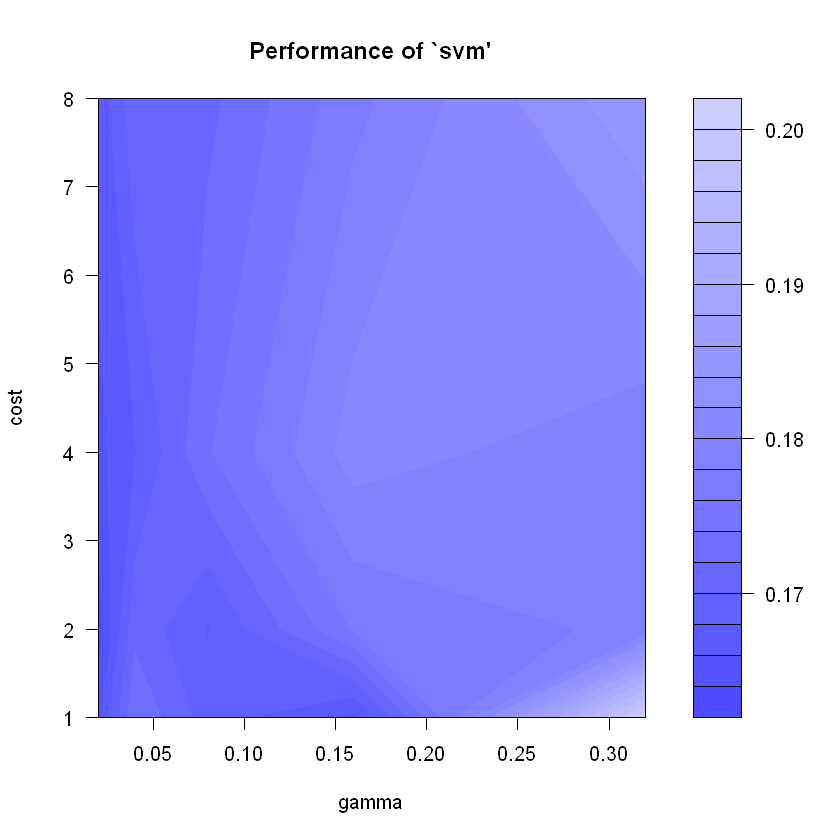

In [15]:
library(e1071)
Loreg.tunesvm=tune.svm(as.factor(LobaOreg)~ . ,data=lichenLO, gamma=c(0.02,0.04,0.08,0.16,0.32),cost=c(1,2,4,8))

plot(Loreg.tunesvm)

summary(Loreg.tunesvm)